In [9]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ===== LOAD SAVED MODEL & VECTORIZER =====
model_path = r"C:\Users\Moses Tumbo\OneDrive\Documents\model\tic-tac-toe\models\spam_classifier_model.pkl"
vectorizer_path = r"C:\Users\Moses Tumbo\OneDrive\Documents\model\tic-tac-toe\models\tfidf_vectorizer.pkl"

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)
print("✅ Model and TF-IDF vectorizer loaded")

# ===== LOAD DATA =====
data_path = r"C:\Users\Moses Tumbo\OneDrive\Documents\model\tic-tac-toe\data\spam.csv"
df = pd.read_csv(data_path)
print("✅ Dataset loaded")

# ===== CHECK COLUMNS =====
print("Columns in dataset:", df.columns.tolist())

# Replace these with your actual column names from df.columns
text_column = "cleaned_text"  # the column with email/SMS text
label_column = "label"        # the column with spam/ham labels (update if different)

X = df[text_column]
y = df[label_column]

# ===== SPLIT TEST DATA =====
_, X_test, _, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ===== TRANSFORM TEXT =====
X_test_vec = vectorizer.transform(X_test)

# ===== MAKE PREDICTIONS =====
y_pred = model.predict(X_test_vec)

# ===== EVALUATE =====
print("\n📊 ACCURACY")
print(accuracy_score(y_test, y_pred))

print("\n📊 CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))

print("\n📊 CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))


✅ Model and TF-IDF vectorizer loaded
✅ Dataset loaded
Columns in dataset: ['label', 'text', 'cleaned_text']

📊 ACCURACY
0.9676840215439856

📊 CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1114
   macro avg       0.98      0.88      0.92      1114
weighted avg       0.97      0.97      0.97      1114


📊 CONFUSION MATRIX
[[965   0]
 [ 36 113]]


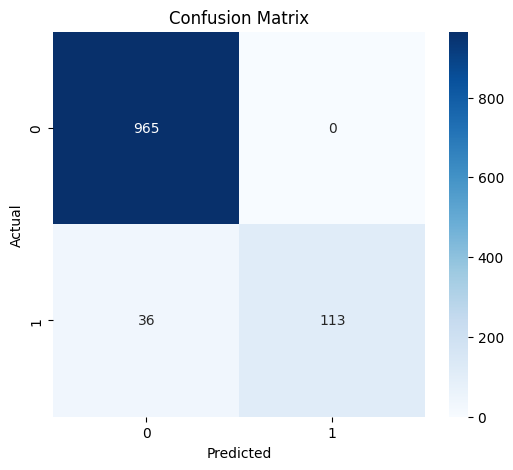

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # get class labels from your dataset

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
